## **Data Visualization**

### Import

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import seaborn as sns

### Load The Dataset


In [2]:
df_origin = pd.read_csv('../data/ireland-news-headlines.csv')
df = df_origin.copy()

### Analayze The Dataset

Arrangement of the DataFrame.

In [3]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
df['day'] = df['publish_date'].dt.day
df.drop('publish_date', axis=1, inplace=True)
print(df.shape)
print(df.head())

(1611495, 5)
  headline_category                                    headline_text  year  \
0              news         UUP sees possibility of voting Major out  1996   
1              news   Pubs targeted as curbs on smoking are extended  1996   
2              news  Papers reveal secret links with O'Neill cabinet  1996   
3              news      Domestic chaos as Italy takes EU presidency  1996   
4              news     Learning about the star to which we owe life  1996   

   month  day  
0      1    2  
1      1    2  
2      1    2  
3      1    2  
4      1    2  


#### Erase duplicated rows and nan cells

In [4]:
print(f'Number of duplicated rows: {df.iloc[:,:-3].duplicated().sum()}')

Number of duplicated rows: 86916


In [5]:
df.drop_duplicates(subset=['headline_category', 'headline_text'],inplace=True)
df = df.dropna() 
df = df.reset_index()
df = df.iloc[:,1:]
print(df.shape)

(1524575, 5)


In [6]:
df25 = df.copy()

#### Visualization

Split the headline category to 4 levels
First we will only look at the headline in the first level

In [7]:
df[['headline_category', 'headline_category_2', 'headline_category_3', 'headline_category_4']] = df['headline_category'].str.split('.', expand=True)
Num_pri_classes = len(df['headline_category'].unique())
print(f'Number of primary classes: {Num_pri_classes}')
Names_pri_classes = df['headline_category'].unique()
print(f'The classes are: {Names_pri_classes}')
Num_all_classes = len(df_origin['headline_category'].unique())
print(f'Number of all the classes: {Num_all_classes}')

Number of primary classes: 6
The classes are: ['news' 'culture' 'opinion' 'business' 'sport' 'lifestyle']
Number of all the classes: 103


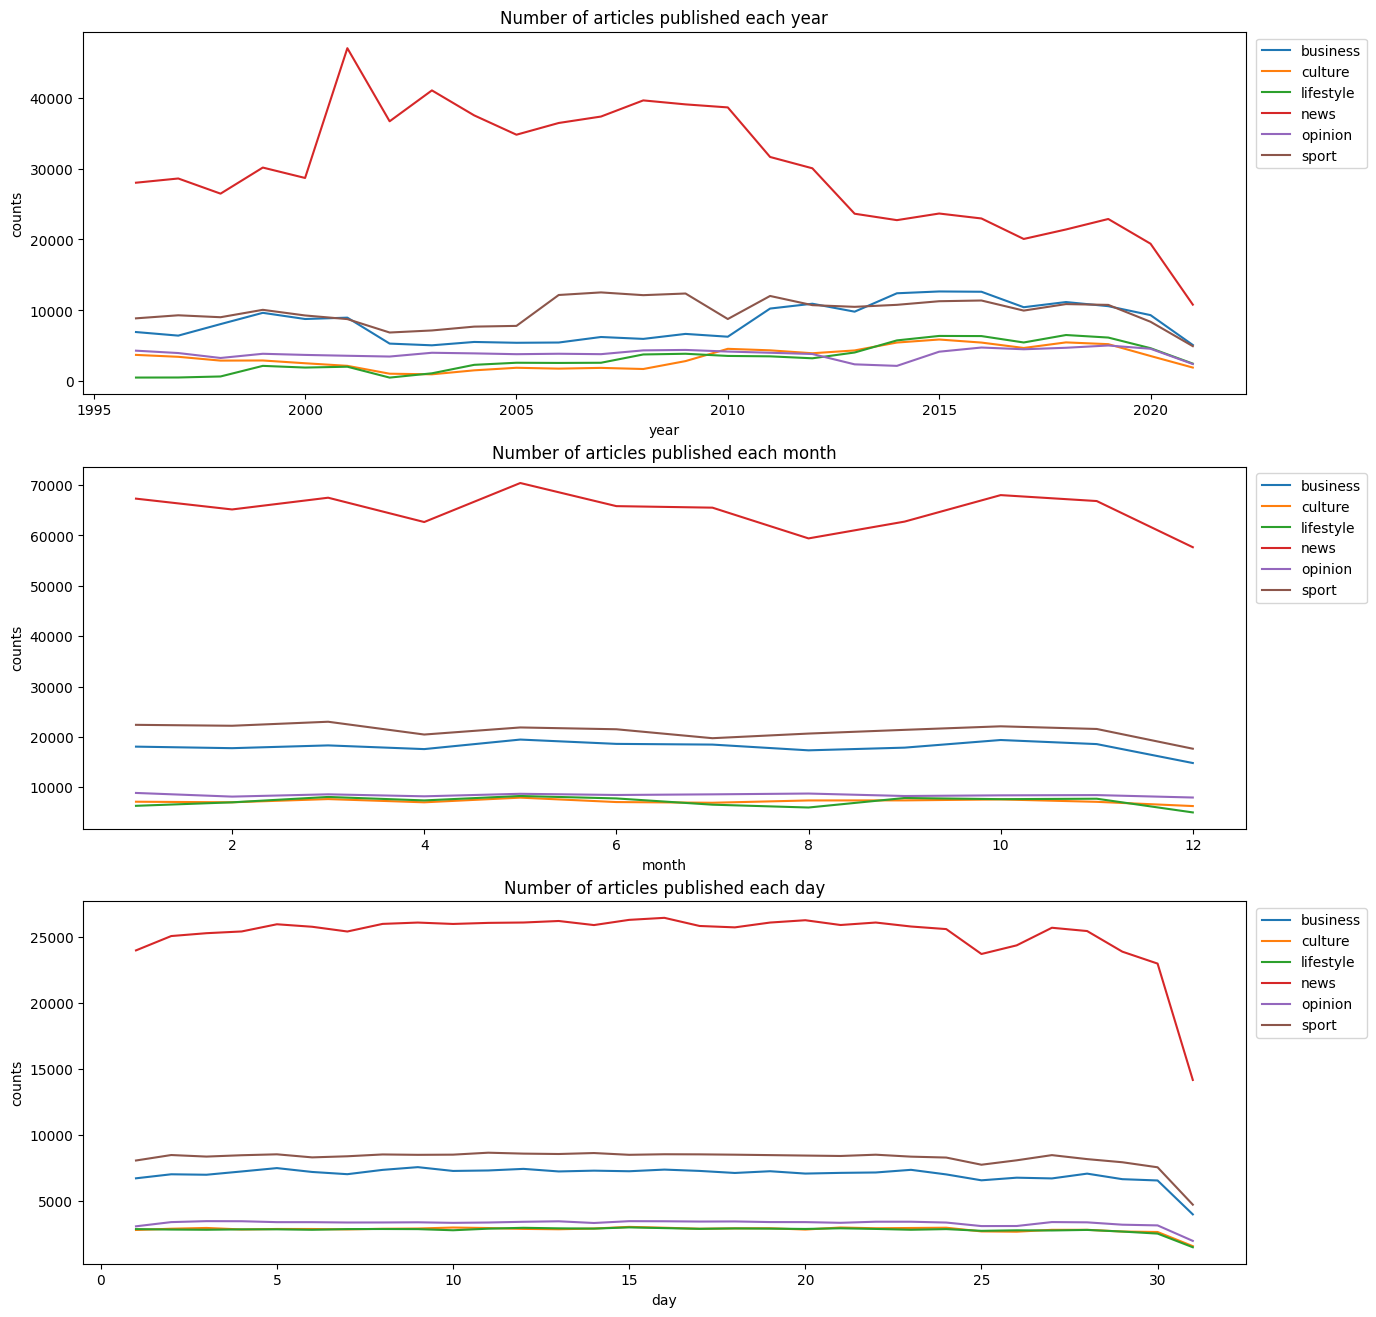

In [8]:
fig, axs=plt.subplots(3,1,figsize=(15,16))
df.groupby(['year','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=axs[0])
axs[0].legend(loc=0, ncol=1,bbox_to_anchor=(1.11,1))
axs[0].set_title("Number of articles published each year")
axs[0].set_ylabel('counts')
axs[0].set_xlabel('year')
df.groupby(['month','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=axs[1])
axs[1].legend(loc=0, ncol=1,bbox_to_anchor=(1.11,1))
axs[1].set_title("Number of articles published each month")
axs[1].set_ylabel('counts')
axs[1].set_xlabel('month')
df.groupby(['day','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=axs[2])
axs[2].legend(loc=0, ncol=1,bbox_to_anchor=(1.11,1))
axs[2].set_title("Number of articles published each day")
axs[2].set_ylabel('counts')
axs[2].set_xlabel('day')
plt.show()


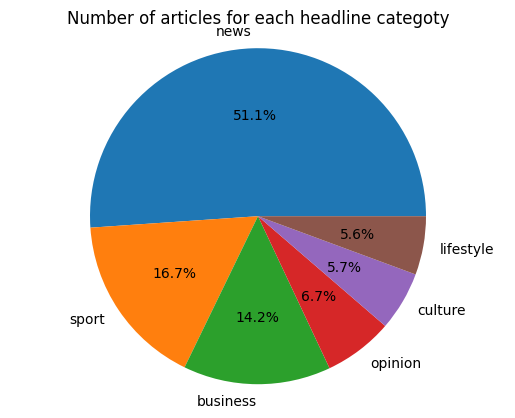

In [9]:
category_counts = df['headline_category'].value_counts()
plt.figure()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Number of articles for each headline categoty')
# plt.title('Distribution of Categories')
plt.axis('equal')
plt.show()

## 25 classes

In [10]:
k = 0
num25 = []
classes25 = []
for cat in df25['headline_category'].unique():
    summ = sum(df25['headline_category'] == cat)
    if summ > 10000:
        k +=1
        # print(f'headline_category: {cat} number of rows: {summ}')
        num25.append(summ)
        classes25.append(cat)
# print(k)
df_25_count = pd.DataFrame(columns=['classes', 'countt'])
df_25_count['classes'] = classes25
df_25_count['countt'] = num25
# df_25.countt = pd.to_numeric(df_25.countt, errors='coerce')
df_25 = df_25_count.sort_values('countt', ascending=False)
# df_25

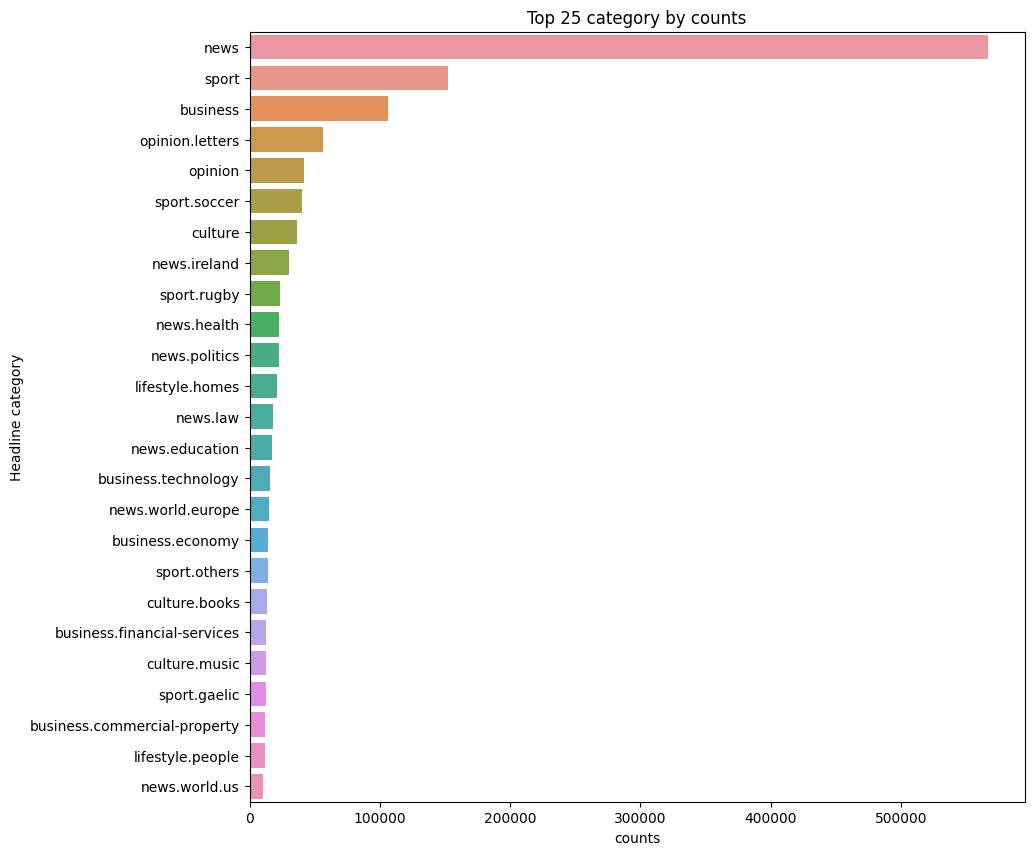

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
df_25_category=df25[df25['headline_category'].isin(list(df25.headline_category.value_counts()[:25].index[:25]))]
sns.barplot(y=df_25_category.headline_category.value_counts().index,x=df_25_category.headline_category.value_counts(),ax=ax)
ax.set_title("Top 25 category by counts")
ax.set_xlabel('counts')
ax.set_ylabel('Headline category')
plt.show()

#### Clean The Data

* converting all letters to lower case
* removing numbers
* removing punctuations
* removing stop words
* Inflections of a word

In [ ]:
df_6_category = df.iloc[:,:-3].copy()

In [14]:
df_6_category.insert(2, "clean_headline_text",  None)
df_25_category.insert(2, "clean_headline_text",  None)

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
stemmer= PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

for i, text in enumerate(df_6_category["headline_text"]):
    clean_text = text.lower() # converting all letters to lower case
    clean_text = re.sub(r'\d+', '', clean_text) # removing numbers
    clean_text = clean_text.translate(str.maketrans("","", string.punctuation)) # removing punctuations
    clean_text = clean_text.strip() # removing whitespaces
    wo_sw = ''
    for word in clean_text.split():
        if word not in stopwords: # removing stop words
            word = stemmer.stem(word)
            word = lemmatizer.lemmatize(word) # Inflections of a word
            wo_sw += word + ' '
    clean_text = wo_sw 
    
    df_6_category["clean_headline_text"][i] = clean_text

/tmp/ipykernel_30039/1213426511.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_category["clean_headline_text"][i] = clean_text


In [ ]:
for i, text in enumerate(df_25_category["headline_text"]):
    clean_text = text.lower() # converting all letters to lower case
    clean_text = re.sub(r'\d+', '', clean_text) # removing numbers
    clean_text = clean_text.translate(str.maketrans("","", string.punctuation)) # removing punctuations
    clean_text = clean_text.strip() # removing whitespaces
    wo_sw = ''
    for word in clean_text.split():
        if word not in stopwords: # removing stop words
            word = stemmer.stem(word)
            word = lemmatizer.lemmatize(word) # Inflections of a word
            wo_sw += word + ' '
    clean_text = wo_sw 
    
    df_25_category["clean_headline_text"][i] = clean_text

In [ ]:
# Drop Nan
df_6_category = df_6_category.dropna() 
df_6_category = df_6_category.reset_index()
df_6_category = df_6_category.iloc[:,1:]
df_25_category = df_25_category.dropna() 
df_25_category = df_25_category.reset_index()
df_25_category = df_25_category.iloc[:,1:]


In [19]:
df_25_category.to_csv('../data/ireland-news-headlines-cleaned-25.csv')  
df_6_category.to_csv('../data/ireland-news-headlines-cleaned-6.csv')  

In [21]:
df = pd.read_csv('../data/ireland-news-headlines-cleaned-6.csv')
df = df.iloc[:,1:]
df

,headline_category,headline_text,clean_headline_text,year,month,day
0,news,UUP sees possibility of voting Major out,uup see possibl vote major,1996,1,2
1,news,Pubs targeted as curbs on smoking are extended,pub target curb smoke extend,1996,1,2
2,news,Papers reveal secret links with O'Neill cabinet,paper reveal secret link oneil cabinet,1996,1,2
3,news,Domestic chaos as Italy takes EU presidency,domest chao itali take eu presid,1996,1,2
4,news,Learning about the star to which we owe life,learn star owe life,1996,1,2
...,...,...,...,...,...,...
1524570,news,Reserve members of Defence Forces to be allowe...,reserv member defenc forc allow serv oversea f...,2021,6,30
1524571,culture,Maureen Dowd: Joe Biden is 'crazy about the Ir...,maureen dowd joe biden crazi irish plan celebr...,2021,6,30
1524572,sport,Andy Murray rolls back the years to own Centre...,andi murray roll back year centr court,2021,6,30
1524573,news,Delta variant could do 'significant damage' in...,delta variant could signific damag partial vac...,2021,6,30


Display of repeated words in the data by title in a word cloud

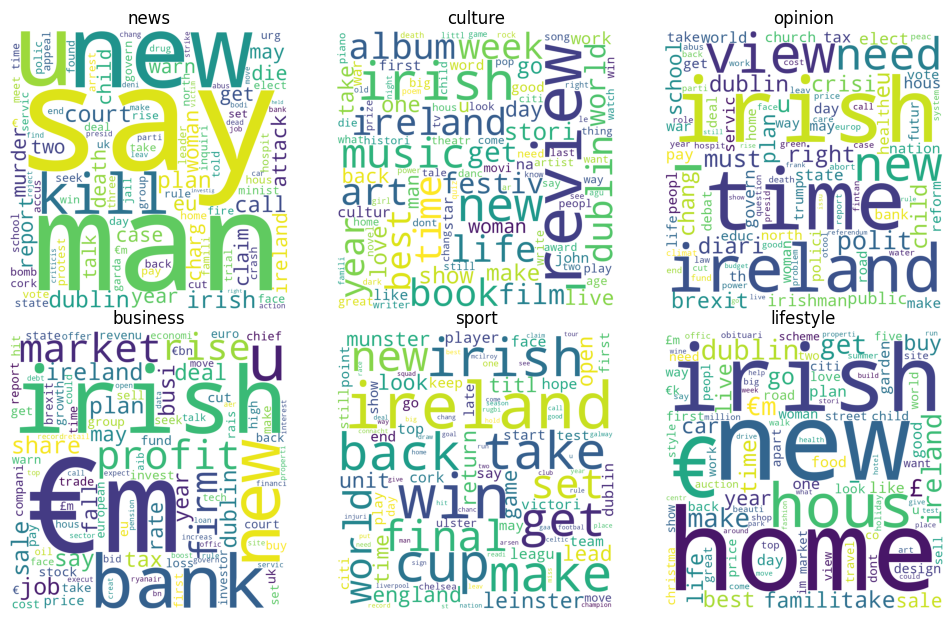

In [22]:
from wordcloud import WordCloud

word_clouds = []
top_5 = []
for cat in df['headline_category'].unique():
    
    df3 = df[df['headline_category'] == cat] 
    df3 = df3['clean_headline_text'].astype(str)
    text = ' '.join(df3.tolist())

    word_frequencies = {}
    for word in text.split():
        if word not in word_frequencies:
            word_frequencies[word] = 0
        word_frequencies[word] += 1

    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(word_frequencies)
    word_clouds.append(wordcloud)
    top_5_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:5]
    top_5.append(top_5_words)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), facecolor=None)
axes[0, 0].imshow(word_clouds[0])
axes[0, 0].set_title('news')
axes[0, 0].axis('off')
axes[0, 1].imshow(word_clouds[1])
axes[0, 1].set_title('culture')
axes[0, 1].axis('off')
axes[0, 2].imshow(word_clouds[2])
axes[0, 2].set_title('opinion')
axes[0, 2].axis('off')
axes[1, 0].imshow(word_clouds[3])
axes[1, 0].set_title('business')
axes[1, 0].axis('off')
axes[1, 1].imshow(word_clouds[4])
axes[1, 1].set_title('sport')
axes[1, 1].axis('off')
axes[1, 2].imshow(word_clouds[5])
axes[1, 2].set_title('lifestyle')
axes[1, 2].axis('off')
plt.tight_layout(pad=0)
    
plt.show()

In [28]:
i = 0
for cat in df['headline_category'].unique():
    print(f'Top 5 words in {cat}:')
    print(top_5[i])
    i+=1

Top 5 words in news:
[('say', 34132), ('man', 29779), ('new', 23105), ('u', 22321), ('kill', 19599)]
Top 5 words in culture:
[('review', 5898), ('irish', 3355), ('new', 2681), ('–', 2557), ('music', 1998)]
Top 5 words in opinion:
[('irish', 4584), ('time', 4099), ('ireland', 2722), ('–', 2510), ('view', 2289)]
Top 5 words in business:
[('€m', 11864), ('irish', 10824), ('bank', 10210), ('new', 9467), ('u', 7899)]
Top 5 words in sport:
[('ireland', 10283), ('win', 9553), ('cup', 6959), ('irish', 6764), ('take', 6465)]
Top 5 words in lifestyle:
[('home', 3937), ('new', 3671), ('irish', 3338), ('€', 2771), ('hous', 2563)]


- אולי כדאי לשקול לסנן עוד מילים עם אות אחת או סימנים מפריעים

#### Models

In [34]:
sum(df['clean_headline_text'].isna())

0

In [33]:
df = df.dropna() 
df = df.reset_index()
df = df.iloc[:,1:]

In [35]:
# Group the DataFrame by 'headline' and sample 50 rows from each group
df_sampled = df.groupby('headline_category').apply(lambda x: x.sample(n=2000)).reset_index(drop=True)
# df_sampled = df_sampled.iloc[-10000:,:]
df_sampled

,headline_category,headline_text,clean_headline_text,year,month,day
0,business,US rate rise 'will aim to support the dollar',u rate rise aim support dollar,2004,12,13
1,business,Gifting property to my son,gift properti son,2019,1,8
2,business,Tesco to move most of its Irish financial back...,tesco move irish financi backoffic work india,2006,11,14
3,business,Singer has his sights on long battle,singer sight long battl,2013,9,19
4,business,Audi Ireland reports record sales for first qu...,audi ireland report record sale first quarter,2015,4,3
...,...,...,...,...,...,...
11995,sport,England opt for greyhound look,england opt greyhound look,2001,1,31
11996,sport,Hayes makes smooth transition from slurry pit ...,hay make smooth transit slurri pit bear pit,2009,6,23
11997,sport,Darragh Ó Sé: Mayo know emotion won't bring ho...,darragh ó sé mayo know emot wont bring home sam,2016,9,7
11998,sport,De Villiers to arrive in Munster on Thursday,de villier arriv munster thursday,2009,9,14


##### t-SNE

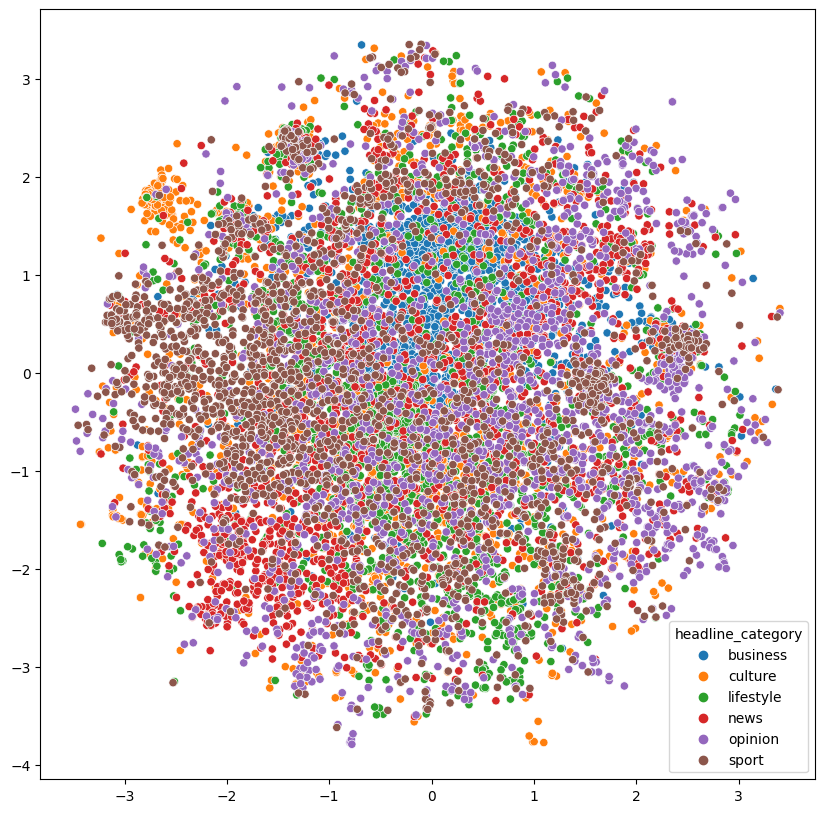

In [37]:
# t-SNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer()

# Convert article titles to TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(df_sampled['clean_headline_text'])

# Perform t-SNE on the TF-IDF vectors to reduce their dimensionality to 2D
tsne = TSNE(n_components=2,perplexity=300, random_state=42, init="random")
tsne_vectors = tsne.fit_transform(tfidf_vectors)

# Plot the 2D t-SNE vectors
plt.figure(figsize=(10, 10))
# plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], marker='.')
# plt.title('t-SNE Visualization of Article Titles')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.show()
g = sns.scatterplot(data=df_sampled, x=tsne_vectors[:, 0] , y=tsne_vectors[:, 1] ,hue='headline_category')

##### LDA

In [73]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary

# nltk.download('punkt')
# Step 1: Text preprocessing
# nltk.download('stopwords')
# nltk.download('wordnet')
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# Tokenizer function
def tokenize_sentence(sentence):
    return word_tokenize(sentence)


# Step 2: Tokenize the text
df_sampled['tokens'] = df_sampled['clean_headline_text'].apply(tokenize_sentence)

# Step 3: Create a document-term matrix
documents = df_sampled['tokens'].tolist()
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Step 4: Apply LDA model
num_topics = 6
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Step 5: Interpret the topics
topics = lda_model.print_topics(num_topics=num_topics, num_words=2)
for topic in topics:
    print(topic)

(0, '0.012*"irish" + 0.012*"win"')
(1, '0.006*"time" + 0.006*"top"')
(2, '0.012*"man" + 0.009*"ireland"')
(3, '0.013*"cup" + 0.012*"new"')
(4, '0.008*"ireland" + 0.008*"u"')
(5, '0.011*"ireland" + 0.009*"look"')
